## Imports

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import mysql.connector
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
import joblib
from sklearn.model_selection import train_test_split

In [2]:
with open('../config.env') as f:
    credentials=f.read()
credentials=credentials.split(" ")
con = mysql.connector.connect(username=credentials[0],password=credentials[1],host=credentials[2],port=credentials[3],database=credentials[4])
query=con.cursor()

In [3]:
sql="SELECT * FROM total_india_cases"
query.execute(sql)
result=query.fetchall()
column=[columns[0] for columns in query.description]

In [4]:
data=pandas.DataFrame(result,columns=column)

In [5]:
data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,1,2020-01-30,737454,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,2020-02-02,737457,2,2,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
2,3,2020-02-03,737458,3,3,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
3,4,2020-02-14,737469,3,0,3,0,0,0,0,...,0,-3,3,0,0,0,0,0,0,0
4,5,2020-03-02,737486,5,2,3,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,559,2021-09-07,738040,33095455,384603,32256563,441443,534943093,540557826,166985192,...,284709,12034,270234,2389,11758800,37226299,16203211,12846,-3,52
559,560,2021-09-08,738041,33138856,387035,32297183,441782,536817243,546897006,169700422,...,282135,4103,275763,2221,11948509,37097380,16462714,12856,10,48
560,561,2021-09-09,738042,33163007,386515,32321580,442040,538604854,551843120,171941466,...,260662,-7014,265495,2124,12069786,36311782,16512836,12872,16,57
561,562,2021-09-10,738043,33200882,387395,32358251,442350,540196989,556541427,174048261,...,255870,-12032,265744,2092,11956951,36675214,16703269,12886,14,66


In [23]:
# %matplotlib qt
%matplotlib inline

<AxesSubplot:xlabel='date', ylabel='total_confirmed'>

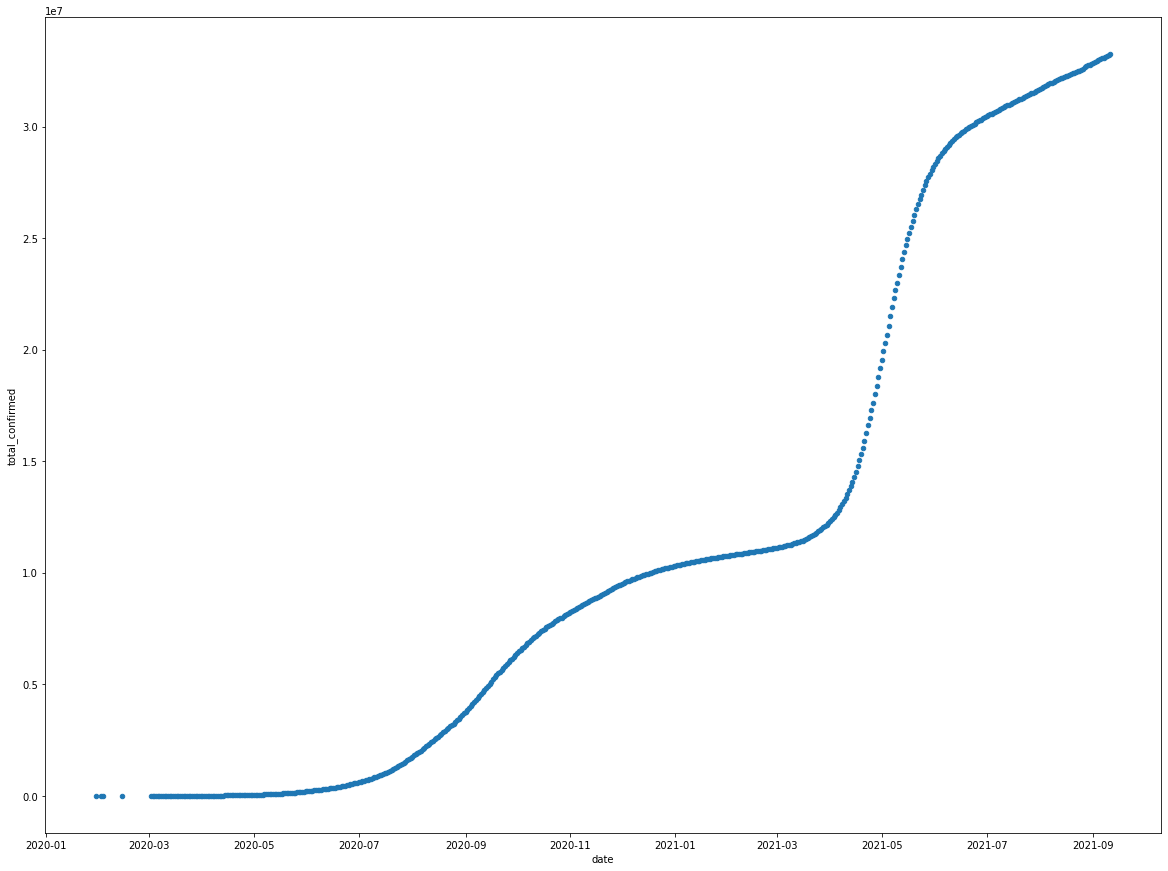

In [24]:
data.plot(kind='scatter',x='date',y='total_confirmed',figsize=(20,15))

<AxesSubplot:xlabel='date'>

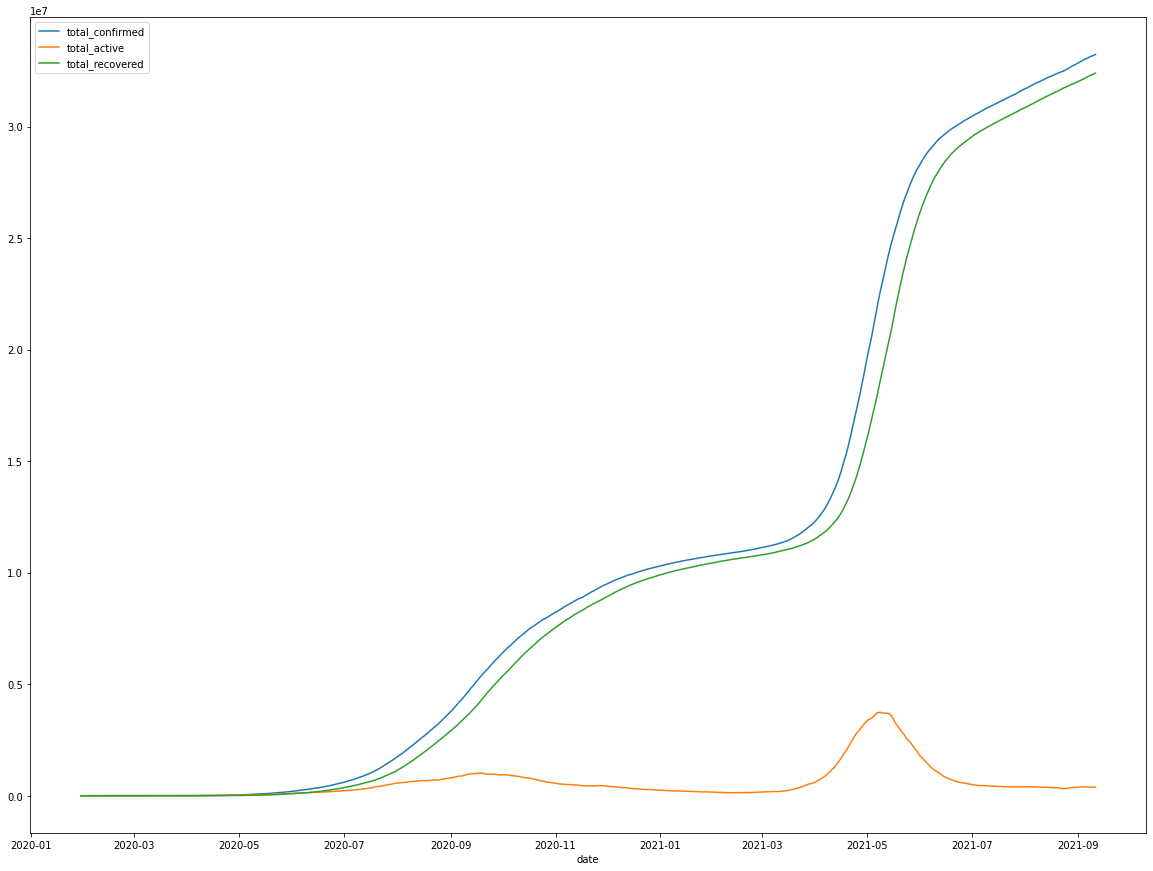

In [25]:
data.plot(kind='line',x='date',y=['total_confirmed','total_active','total_recovered'],figsize=(20,15))

<AxesSubplot:xlabel='date'>

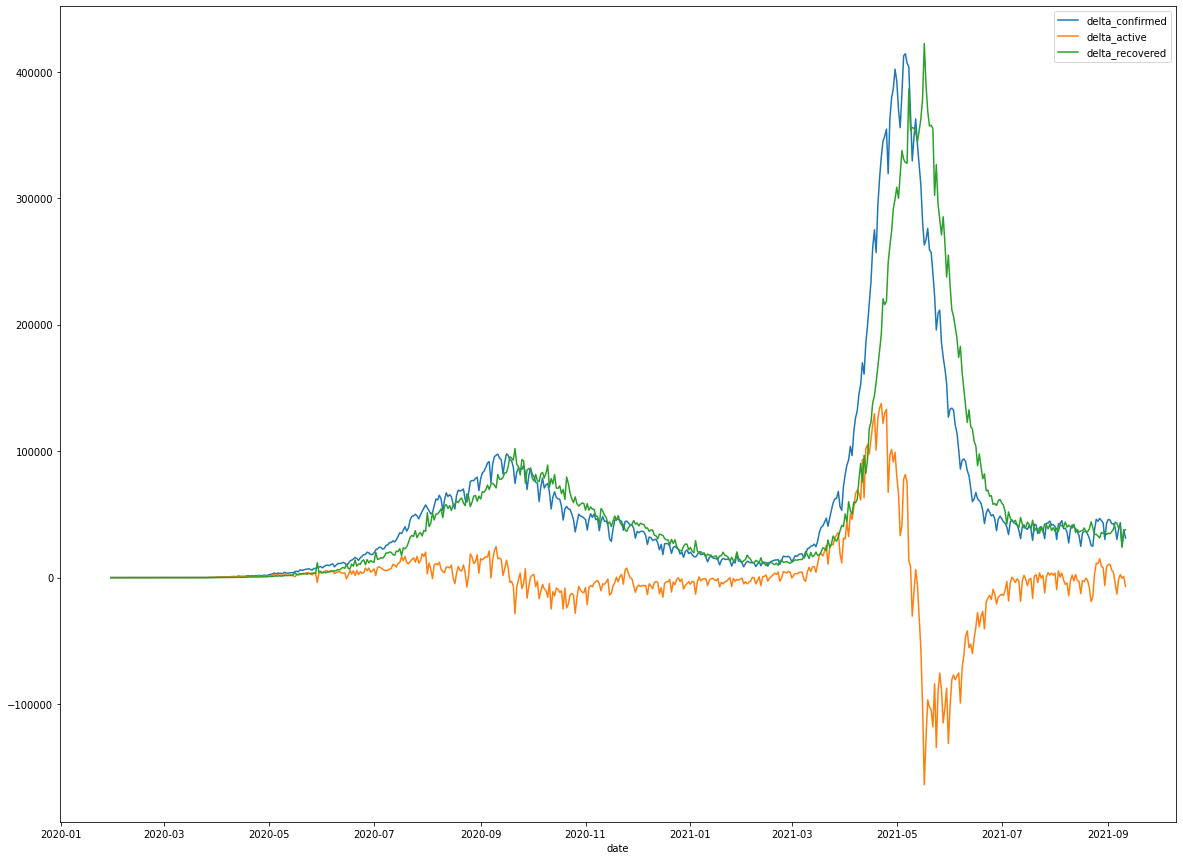

In [26]:
data.plot(kind='line',x='date',y=['delta_confirmed','delta_active','delta_recovered'],figsize=(20,15))

<AxesSubplot:xlabel='date'>

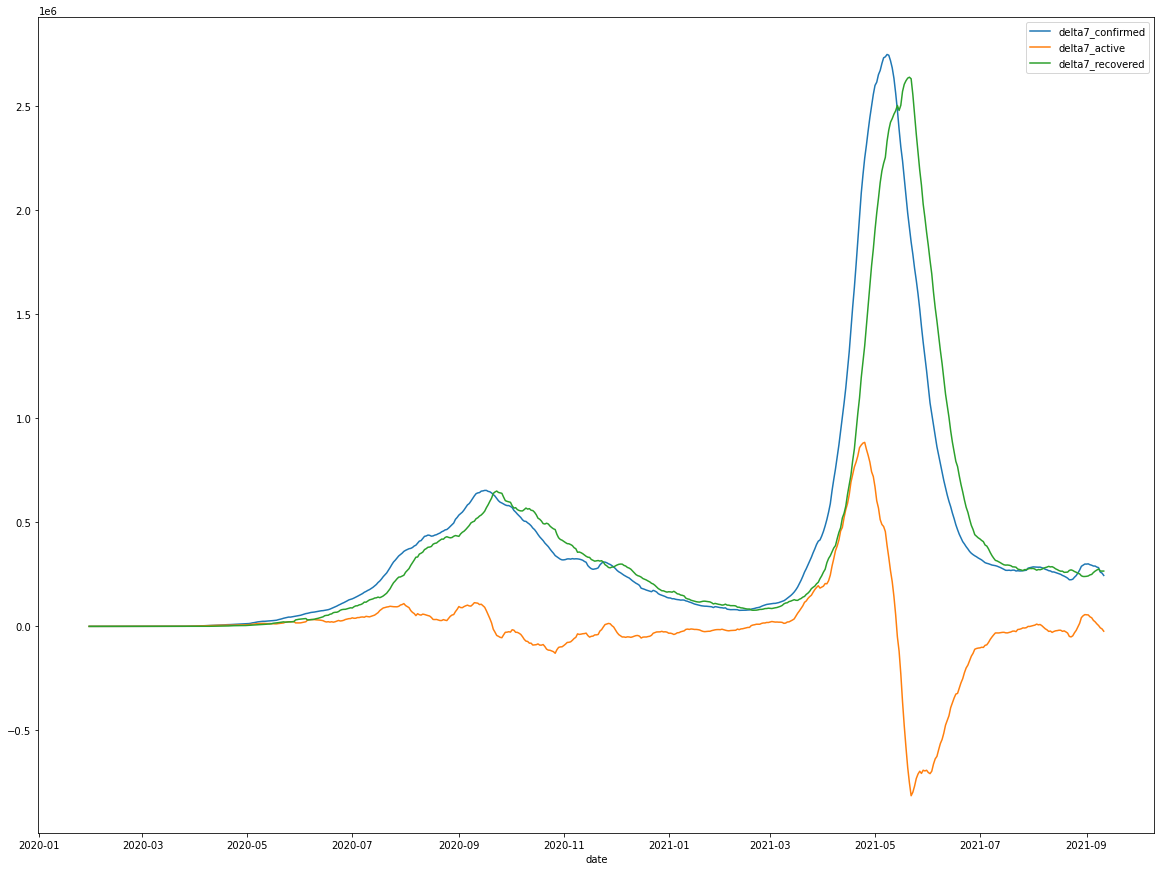

In [27]:
data.plot(kind='line',x='date',y=['delta7_confirmed','delta7_active','delta7_recovered'],figsize=(20,15))

### Train Test Splitting

In [47]:
train_data,test_data=train_test_split(data,train_size=0.95,shuffle=False)

In [48]:
train_data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,1,2020-01-30,737454,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,2020-02-02,737457,2,2,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
2,3,2020-02-03,737458,3,3,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
3,4,2020-02-14,737469,3,0,3,0,0,0,0,...,0,-3,3,0,0,0,0,0,0,0
4,5,2020-03-02,737486,5,2,3,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,530,2021-08-09,738011,31997024,382292,31173390,428715,483278545,400158057,114342211,...,271569,-16572,284585,3488,11983756,27531131,8425023,12627,-10,68
530,531,2021-08-10,738012,32035404,380068,31213487,429211,485056507,403596088,115484436,...,267419,-24189,288130,3423,11914200,25505491,8288463,12638,11,55
531,532,2021-08-11,738013,32076990,382031,31252614,429702,487370196,406980329,116690690,...,266208,-22607,285384,3382,12476833,25854054,8474670,12643,5,49
532,533,2021-08-12,738014,32117071,379360,31294770,430285,489470779,411629356,117953600,...,261284,-28902,286634,3500,12937129,25998306,8257055,12656,13,52


In [49]:
test_data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
534,535,2021-08-14,738016,32191967,379571,31368465,431253,493624440,422575401,121270889,...,258407,-21371,276368,3361,13585255,28197250,8838548,12678,0,49
535,536,2021-08-15,738017,32225212,376460,31404401,431674,494805652,424072750,121784538,...,255616,-20231,272472,3335,13038420,28405157,8787372,12677,-1,40
536,537,2021-08-16,738018,32249908,363845,31441272,432112,496629524,431194809,123535800,...,252884,-18447,267882,3397,13350979,31036752,9193589,12679,2,52
537,538,2021-08-17,738019,32285116,361451,31478415,432552,498427083,435720056,124931974,...,249712,-18617,264928,3341,13370576,32123968,9447538,12698,19,60
538,539,2021-08-18,738020,32321618,358140,31517684,433079,500300840,440102169,126386264,...,244628,-23891,265070,3377,12930644,33121840,9695574,12715,17,72
539,540,2021-08-19,738021,32358218,357734,31554141,433622,502699702,444486031,127795457,...,241147,-21626,259371,3337,13228923,32856675,9841857,12721,6,65
540,541,2021-08-20,738022,32392526,355371,31590426,433998,504576158,447303462,128813888,...,236694,-26492,259897,3236,12875581,30457347,9470100,12731,10,53
541,542,2021-08-21,738023,32423549,347411,31629003,434399,506256239,450755650,130733727,...,231582,-32160,260538,3146,12631799,28180249,9462838,12736,5,58
542,543,2021-08-22,738024,32448969,328340,31673106,434784,507551399,451513534,131036061,...,223757,-48120,268705,3110,12745747,27440784,9251523,12739,3,62
543,544,2021-08-23,738025,32473763,313215,31712659,435141,509391792,456151209,132846596,...,223855,-50630,271387,3029,12762268,24956400,9310796,12748,9,69


In [50]:
train_features1=train_data[['ordinal_date','delta_tested']].to_numpy()

In [51]:
train_features2=train_data[['ordinal_date','delta_tested','delta_recovered']].to_numpy()

In [52]:
train_features3=train_data[['ordinal_date','delta_tested','delta_recovered','delta_active']].to_numpy()

In [53]:
train_labels=train_data['delta_confirmed']

In [54]:
train_labels

0          1
1          1
2          1
3          0
4          2
       ...  
529    27428
530    38380
531    41586
532    40081
533    38761
Name: delta_confirmed, Length: 534, dtype: int64

In [55]:
test_features1=test_data[['ordinal_date','delta_tested']].to_numpy()

In [56]:
test_features2=test_data[['ordinal_date','delta_tested','delta_recovered']].to_numpy()

In [57]:
test_features3=test_data[['ordinal_date','delta_tested','delta_recovered','delta_active']].to_numpy()

In [58]:
test_labels=test_data['delta_confirmed']

In [59]:
test_labels

534    36135
535    33245
536    24696
537    35208
538    36502
539    36600
540    34308
541    31023
542    25420
543    24794
544    37739
545    46129
546    44550
547    46806
548    45064
549    43374
550    30248
551    43073
552    45975
553    45624
554    42667
555    42607
556    39537
557    30164
558    38135
559    43401
560    24151
561    37875
562    31288
Name: delta_confirmed, dtype: int64

## Model selection

In [69]:
model1=RandomForestRegressor(max_depth=100)
model2=DecisionTreeRegressor(max_depth=100)
model3=ExtraTreeRegressor(max_depth=100)

In [70]:
model1.fit(train_features1,train_labels)

RandomForestRegressor(max_depth=100)

In [71]:
train_data_predicted1=model1.predict(train_features1)

In [72]:
train_data_predicted1

array([9.7000000e-01, 9.7000000e-01, 9.7000000e-01, 4.4000000e-01,
       3.4200000e+00, 2.9800000e+00, 1.4600000e+01, 6.7500000e+00,
       1.6800000e+00, 2.8900000e+00, 4.7100000e+00, 8.5900000e+00,
       1.2690000e+01, 9.7800000e+00, 9.7300000e+00, 1.9460000e+01,
       1.0670000e+01, 1.0730000e+01, 1.3650000e+01, 1.9360000e+01,
       3.3440000e+01, 2.5930000e+01, 5.3110000e+01, 7.2210000e+01,
       7.1680000e+01, 8.7410000e+01, 7.9100000e+01, 8.4170000e+01,
       8.3530000e+01, 1.3446000e+02, 1.3331000e+02, 1.3915000e+02,
       2.2674000e+02, 2.5496000e+02, 3.8192000e+02, 4.7929000e+02,
       5.4451000e+02, 5.5337000e+02, 5.7859000e+02, 5.0961000e+02,
       5.6345000e+02, 5.7380000e+02, 7.6543000e+02, 8.3819000e+02,
       8.5200000e+02, 8.2474000e+02, 1.1283600e+03, 1.0320700e+03,
       9.9312000e+02, 1.0247600e+03, 1.0045800e+03, 1.2930000e+03,
       1.4120000e+03, 1.0978700e+03, 1.6187600e+03, 1.3607400e+03,
       1.5870000e+03, 1.4483200e+03, 1.7450300e+03, 1.6315200e

In [73]:
train_labels

0          1
1          1
2          1
3          0
4          2
       ...  
529    27428
530    38380
531    41586
532    40081
533    38761
Name: delta_confirmed, Length: 534, dtype: int64

In [74]:
mean_absolute_error(train_labels,train_data_predicted1)

1467.9437078651688

In [76]:
numpy.sqrt(mean_squared_error(train_labels,train_data_predicted1))

2804.455827275068

In [77]:
mean_squared_log_error(train_labels,train_data_predicted1)

0.006707582737975113

In [78]:
r2_score(train_labels,train_data_predicted1)

0.9988856314135162

In [80]:
model1.fit(train_features2,train_labels)

RandomForestRegressor(max_depth=100)

In [83]:
train_data_predicted2=model1.predict(train_features2)

In [84]:
train_data_predicted2

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.6700000e+00,
       3.1600000e+00, 2.7000000e+00, 1.3950000e+01, 6.5100000e+00,
       1.4100000e+00, 2.4800000e+00, 4.7000000e+00, 8.5400000e+00,
       1.2450000e+01, 9.7700000e+00, 9.7000000e+00, 2.7580000e+01,
       1.0730000e+01, 1.0650000e+01, 1.3110000e+01, 1.8440000e+01,
       4.1000000e+01, 2.8280000e+01, 5.1980000e+01, 6.9330000e+01,
       7.1160000e+01, 8.7610000e+01, 7.9060000e+01, 8.2640000e+01,
       8.3180000e+01, 1.3773000e+02, 1.3474000e+02, 1.6482000e+02,
       2.1332000e+02, 2.7989000e+02, 3.8719000e+02, 4.7776000e+02,
       5.5226000e+02, 5.6980000e+02, 5.9415000e+02, 5.1647000e+02,
       5.6457000e+02, 6.1307000e+02, 7.6976000e+02, 8.5392000e+02,
       8.9033000e+02, 8.3855000e+02, 1.0859300e+03, 1.0200400e+03,
       9.7401000e+02, 1.0289300e+03, 1.0000800e+03, 1.2833700e+03,
       1.4529900e+03, 1.1452000e+03, 1.6057100e+03, 1.3611600e+03,
       1.6102600e+03, 1.4616500e+03, 1.7174600e+03, 1.6146400e

In [86]:
train_labels

0          1
1          1
2          1
3          0
4          2
       ...  
529    27428
530    38380
531    41586
532    40081
533    38761
Name: delta_confirmed, Length: 534, dtype: int64

In [85]:
mean_absolute_error(train_labels,train_data_predicted2)

1909.340692883895

In [87]:
numpy.sqrt(mean_squared_error(train_labels,train_data_predicted2))

4010.956678477239

In [88]:
mean_squared_log_error(train_labels,train_data_predicted2)

0.013060120212149218

In [89]:
r2_score(train_labels,train_data_predicted2)

0.997720562987584